In [2]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity
from astroquery.gaia import Gaia

Created TAP+ (v1.0.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


In [3]:
import pandas as pd
from astropy.table import Table

In [4]:
import astropy.coordinates as coord
import astropy.units as u

In [4]:
first="SELECT * \
    FROM gaiadr2.gaia_source \
    WHERE "
stor="OR "
last=    "AND abs(parallax)>3.69 ;"

In [5]:
from astropy.io.votable import parse_single_table

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Suppress warnings. Comment this out if you wish to see the warning messages
import warnings
warnings.filterwarnings('ignore')

In [28]:
from mpl_toolkits.mplot3d import Axes3D

In [4]:
tables = Gaia.load_tables(only_names=True)
for table in (tables):
    print (table.get_qualified_name())

Retrieving tables...
Parsing tables...
Done.
public.public.dual
public.public.hipparcos
public.public.hipparcos_newreduction
public.public.hubble_sc
public.public.igsl_source
public.public.igsl_source_catalog_ids
public.public.tycho2
tap_schema.tap_schema.columns
tap_schema.tap_schema.key_columns
tap_schema.tap_schema.keys
tap_schema.tap_schema.schemas
tap_schema.tap_schema.tables
gaiadr1.gaiadr1.aux_qso_icrf2_match
gaiadr1.gaiadr1.ext_phot_zero_point
gaiadr1.gaiadr1.allwise_best_neighbour
gaiadr1.gaiadr1.allwise_neighbourhood
gaiadr1.gaiadr1.gsc23_best_neighbour
gaiadr1.gaiadr1.gsc23_neighbourhood
gaiadr1.gaiadr1.ppmxl_best_neighbour
gaiadr1.gaiadr1.ppmxl_neighbourhood
gaiadr1.gaiadr1.sdss_dr9_best_neighbour
gaiadr1.gaiadr1.sdss_dr9_neighbourhood
gaiadr1.gaiadr1.tmass_best_neighbour
gaiadr1.gaiadr1.tmass_neighbourhood
gaiadr1.gaiadr1.ucac4_best_neighbour
gaiadr1.gaiadr1.ucac4_neighbourhood
gaiadr1.gaiadr1.urat1_best_neighbour
gaiadr1.gaiadr1.urat1_neighbourhood
gaiadr1.gaiadr1.cepheid

In [5]:
job2 = Gaia.launch_job_async("SELECT * \
FROM gaiadr2.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',230.7875,-36.8586,0.16))=1 \
AND abs(parallax)>3.69 \
AND parallax IS NOT NULL \
AND parallax >0 \
AND abs(parallax)<66\
AND radial_velocity IS NOT NULL;", dump_to_file=True)

Launched query: 'SELECT * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',230.7875,-36.8586,0.16))=1 AND abs(parallax)>3.69 AND parallax IS NOT NULL AND parallax >0 AND abs(parallax)<66AND radial_velocity IS NOT NULL;'
Retrieving async. results...


In [6]:
j = job2.get_results()
print (j['source_id']) 

     source_id     
-------------------
6007668552771843072
6007672267920658944
6007664227741846400


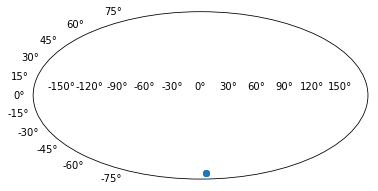

In [7]:
plt.figure()
ax = plt.subplot(111, projection = 'mollweide')
ax.scatter(j['b']*np.pi/180,j['l']*np.pi/180)

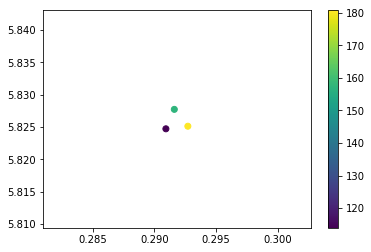

In [8]:
plt.scatter(j['b']*np.pi/180,j['l']*np.pi/180,c=1000/j['parallax'])
plt.colorbar()


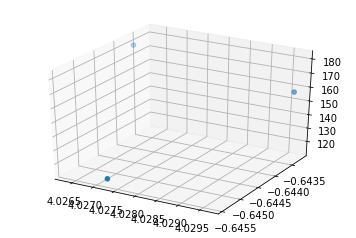

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(j['ra']*np.pi/180,j['dec']*np.pi/180,1000/j['parallax'])


In [12]:
x=1000/j['parallax']*np.cos(j['dec']*np.pi/180)*np.cos(j['ra']*np.pi/180)
y=1000/j['parallax']*np.cos(j['dec']*np.pi/180)*np.sin(j['ra']*np.pi/180)
z=1000/j['parallax']*np.sin(j['dec']*np.pi/180)

In [13]:
vx=[]
vy=[]
vz=[]
for i in range(len(j)):
    mdec=j['dec'][i]
    mra=j['ra'][i]
    mpar=j['parallax'][i]
    mpmra=j['pmra'][i]
    mpmdec=j['pmdec'][i]
    mvr=j['radial_velocity'][i]
    c1 = coord.ICRS(ra=mra*u.degree, dec=mdec*u.degree,
                distance=(mpar*u.mas).to(u.pc, u.parallax()),
                pm_ra_cosdec=mpmra*u.mas/u.yr,
                pm_dec=mpmdec*u.mas/u.yr,
                radial_velocity=mvr*u.km/u.s)
    gc1 = c1.transform_to(coord.Galactocentric)
    vx+=[gc1.v_x.value]
    vy+=[gc1.v_y.value]
    vz+=[gc1.v_z.value]
vx=np.array(vx)
vy=np.array(vy)
vz=np.array(vz)

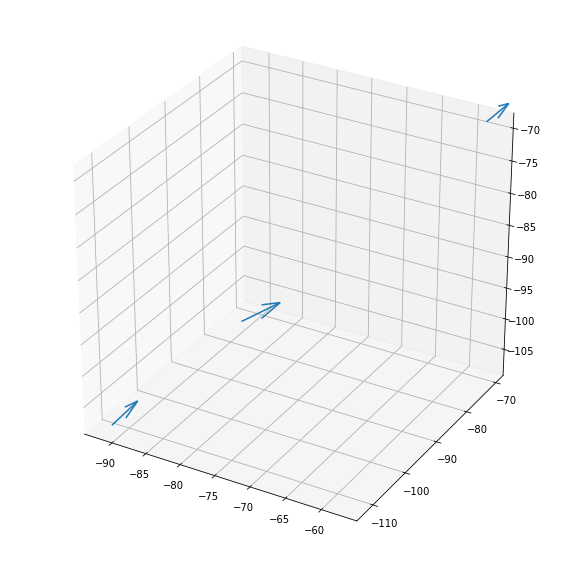

In [17]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
norm=30
ax.quiver(x,y,z,vx/norm,vy/norm,vz/norm,arrow_length_ratio=0.5)


In [19]:
job2 = Gaia.launch_job("SELECT * \
FROM gaiadr2.gaia_source \
WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',230.7875,-36.8586,0.0166))=1 \
AND abs(parallax)>3.69 ;", dump_to_file=True)

Launched query: 'SELECT  TOP 2000 * FROM gaiadr2.gaia_source WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',230.7875,-36.8586,0.0166))=1 AND abs(parallax)>3.69 ;'
Retrieving sync. results...
Query finished.


In [20]:
j2 = job2.get_results()
print (j2['source_id']) 

     source_id     
-------------------
6007671305847996928


In [22]:
j2

solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
,,,,yr,deg,mas,deg,mas,mas,mas,,mas.yr**-1,mas.yr**-1,mas.yr**-1,mas.yr**-1,,,,,,,,,,,,,,,,,mas,,,,mas**-2,um**-1,um**-1,,,,mas,,,,,'electron'.s**-1,'electron'.s**-1,,mag,,'electron'.s**-1,'electron'.s**-1,,mag,,'electron'.s**-1,'electron'.s**-1,,mag,,,mag,mag,mag,km.s**-1,km.s**-1,,K,log(cm.s**-2),'dex',,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,Rsun,Rsun,Rsun,Lsun,Lsun,Lsun,,
int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object
1635721458409799680,Gaia DR2 6007671305847996928,6007671305847996928,1282062568,2015.5,230.77872733227483,0.65842013306740055,-36.866554034981519,0.4331757851461156,-3.788026633203545,0.65691378023421454,-5.7663984,-7.322923906044096,1.0512468509581763,-9.0604521961786002,0.77420765683317005,0.52107435,-0.4541035,-0.17114457,-0.19382127,-0.50825435,-0.080127344,0.15278187,-0.18997973,0.13049364,0.19557875,138,0,136,2,14.895068,548.5191,2.6868515754905493,23.907788950310277,31,False,0.10065998,1.9153785665177741,0.13668702318108039,0.1899817,16,8,0.95946693,0,19,False,155,678.69605765442589,7.2848487028760509,93.165428,18.609177,17,656.22926108325396,24.192923094882474,27.124844,18.308748,16,587.51702171205864,9.6744547649832562,60.728695,17.839369,1.8325527,0,0.46937943,-0.30042839,0.76980782,--,--,0,--,--,--,NOT_AVAILABLE,333.82487185842649,16.745974957580653,237.92760581154249,-17.692371761701651,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,--,http://geadata.esac.esa.int/data-server/datalink/links?ID=6007671305847996928,--


In [8]:
votable = parse_single_table("ucl.xml").to_table()

In [262]:
coun=0
for i,j in zip(votable['RA_d'],votable['DEC_d']):
    quer="CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',%f,%f,0.00166))=1 "%(i,j)
    if coun==0:
        mainq=first+quer
    if coun>0:
        mainq+=stor+quer
    coun+=1
mainq+=last

In [194]:
job3=Gaia.launch_job(mainq, dump_to_file=True)

Launched query: 'SELECT  TOP 2000 *     FROM gaiadr2.gaia_source     WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',253.083939,-38.017535,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',233.785201,-41.166757,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',230.343007,-40.647520,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',231.825541,-36.767558,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',230.788959,-36.858487,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',221.236989,-34.381600,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',237.103263,-42.618059,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('

In [195]:
j = job3.get_results()
print (j['source_id']) 

     source_id     
-------------------
6203501267420034176
5998019895872140800
6005678131786964352
6116497702589633152
6112195451031438464
6000130236633865856
6100296776706622208
5971474902099064576
6107651444350128384
5905821894504811520
                ...
6014848745954046208
6105713692543053056
6021142934659068288
6001046778362375808
6001046782665412480
6209215257546774016
6090407803495351296
6008691721366743168
6008691686995651584
5892241070504664064
5907202503153332224
Length = 54 rows


In [196]:
j.write('ucl.dat',format='ascii')

In [9]:
votable = parse_single_table("lcc.xml").to_table()

In [184]:
coun=0
for i,j in zip(votable['RA_d'],votable['DEC_d']):
    quer="CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',%f,%f,0.00166))=1 "%(i,j)
    if coun==0:
        mainq=first+quer
    if coun>0:
        mainq+=stor+quer
    coun+=1
mainq+=last

In [185]:
job3=Gaia.launch_job(mainq, dump_to_file=True)

Launched query: 'SELECT  TOP 2000 *     FROM gaiadr2.gaia_source     WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',183.619349,-47.612803,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',194.999512,-50.389580,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',187.692810,-58.187991,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',200.658067,-60.988394,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',193.663261,-59.146701,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',197.317467,-60.308348,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',178.283368,-56.727250,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('

In [186]:
j = job3.get_results()
print (j['source_id']) 

     source_id     
-------------------
6071060144084204032
5865593822076433152
5865593822062087168
6061204980818751872
6071087597518919808
6071087597518919040
5869404140942539008
6060547163653418112
6084425360726815360
6084425429440793984
                ...
5233727510607269888
6136589834475210752
5332396137938924672
5332396137919486208
6131118832116740992
6055854551117476480
6057045425291352704
6057045425278236544
6053327426699894912
6127435678624250240
6057088443681190272
Length = 59 rows


In [187]:
j=j[j['parallax']>3]

In [188]:
j.write('lcc.dat',format='ascii')

In [10]:
votable = parse_single_table("upper_sco.xml").to_table()

In [214]:
coun=0
for i,j in zip(votable['RA_d'],votable['DEC_d']):
    quer="CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',%f,%f,0.00166))=1 "%(i,j)
    if coun==0:
        mainq=first+quer
    if coun>0:
        mainq+=stor+quer
    coun+=1
mainq+=last

In [215]:
job3=Gaia.launch_job_async(mainq, dump_to_file=True)

Launched query: 'SELECT *     FROM gaiadr2.gaia_source     WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',250.074679,-23.895883,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',242.829475,-23.322297,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',238.222509,-15.077796,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',241.799996,-21.396448,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',243.447950,-18.583456,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',242.540308,-22.839199,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',234.750237,-19.732558,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',242.

In [216]:
j = job3.get_results()
print (j['source_id']) 

     source_id     
-------------------
6037691855943122176
6034282128641423616
6034282132941462656
6037867429900005120
6037867434201238016
4126469681670065408
6038066858123563008
6038156159083776896
6038192786564494720
6038192786565512064
                ...
6050137571646729216
6050127809183659904
6050135132105459200
6050148498043686912
6050211681303674368
6050249481310620160
6050172068822858624
6050224909802990720
6050121319486692352
6050127809184051840
6050135235181855104
Length = 2605 rows


In [217]:
j=j[j['parallax']>3]

In [219]:
j.write('us.dat',format='ascii')

In [16]:
from astropy.io import ascii

In [33]:
tw=ascii.read('tw_hydrae.txt',guess=False,delimiter='|')

In [41]:
coun=0
for k in tw['coord1']:
    i,j=np.array(k.split()).astype(float)
    quer="CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',%f,%f,0.00166))=1 "%(i,j)
    if coun==0:
        mainq=first+quer
    if coun>0:
        mainq+=stor+quer
    coun+=1
mainq+=last

In [43]:
job3=Gaia.launch_job(mainq, dump_to_file=True)

Launched query: 'SELECT  TOP 2000 *     FROM gaiadr2.gaia_source     WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',177.098883,-37.480139,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',167.307488,-30.027744,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',183.878000,-39.811841,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',166.685900,-37.253203,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',281.040460,71.488280,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',189.002312,-39.871025,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',187.908620,-45.983170,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('I

In [44]:
j = job3.get_results()
print (j['source_id']) 

     source_id     
-------------------
3479724817515231744
5442755872307869568
5442755872310077184
3560046852047030144
3560046856343264000
6071087597518919808
6071087597518919040
5734132118729087488
3481051683236357888
6150508376076490624
                ...
3461188146687604736
5399990638128330752
5400050222210919680
3461345754806282112
6145156610604834048
3503443271894443904
5396978667757576064
5396978667759696000
5397035876723858176
6142504107520247680
6132146982868270976
Length = 164 rows


In [45]:
j.write('tw_hydrae.dat',format='ascii')

In [111]:
bp=ascii.read('bpmg.txt',guess=False,delimiter='|')

In [114]:
bp=bp[bp['prob.'].astype(int)>50]

In [115]:
coun=0
for k in bp['coord1']:
    i,j=np.array(k.split()).astype(float)
    quer="CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',%f,%f,0.00166))=1 "%(i,j)
    if coun==0:
        mainq=first+quer
    if coun>0:
        mainq+=stor+quer
    coun+=1
mainq+=last

In [116]:
job3=Gaia.launch_job(mainq, dump_to_file=True)

Launched query: 'SELECT  TOP 2000 *     FROM gaiadr2.gaia_source     WHERE CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',83.499254,-2.358994,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',324.417445,1.620482,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',234.736650,-57.705281,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',314.011411,-17.181612,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',296.184062,-43.983767,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',75.494976,9.983135,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',317.629000,-27.180920,0.00166))=1 OR CONTAINS(POINT('ICRS',gaiadr2.gaia_source.ra,gaiadr2.gaia_source.dec),CIRCLE('ICRS',2

In [117]:
j = job3.get_results()
print (j['source_id']) 

     source_id     
-------------------
5266270443442455040
3277686910210391296
3277686910210391424
3231945508509506176
2476262466795918080
2731679090943374976
2731679090943375104
4259262275108272384
2962658549471532672
2962658549474035584
                ...
3392114597140989184
3392114597141853056
5369845744451290240
5369845744451059712
  68012529415816832
 101612981989146752
   5595762566731008
4051081838710783232
4051081843083690240
2823757279894208000
3996306127914172928
Length = 228 rows


In [118]:
j=j[j['parallax']>3]

In [119]:
j['parallax'].max()

101.19824974003858

In [120]:
j.write('bpmg.dat',format='ascii')

In [10]:
def astrosol(j):
    x=1000/j['parallax']*np.cos(j['dec']*np.pi/180)*np.cos(j['ra']*np.pi/180)
    y=1000/j['parallax']*np.cos(j['dec']*np.pi/180)*np.sin(j['ra']*np.pi/180)
    z=1000/j['parallax']*np.sin(j['dec']*np.pi/180)
    vx=[]
    vy=[]
    vz=[]
    xa=[]
    ya=[]
    za=[]
    for i in range(len(j)):
        mdec=j['dec'][i]
        mra=j['ra'][i]
        mpar=j['parallax'][i]
        mpmra=j['pmra'][i]
        mpmdec=j['pmdec'][i]
        mvr=j['radial_velocity'][i]
        c1 = coord.ICRS(ra=mra*u.degree, dec=mdec*u.degree,
                    distance=(mpar*u.mas).to(u.pc, u.parallax()),
                    pm_ra_cosdec=mpmra*u.mas/u.yr,
                    pm_dec=mpmdec*u.mas/u.yr,
                    radial_velocity=mvr*u.km/u.s)
        gc1 = c1.transform_to(coord.Galactocentric)
        vx+=[gc1.v_x.value]
        vy+=[gc1.v_y.value]
        vz+=[gc1.v_z.value]
        xa+=[gc1.x.value]
        ya+=[gc1.y.value]
        za+=[gc1.z.value]
    vx=np.array(vx)
    vy=np.array(vy)
    vz=np.array(vz)
    return x,y,z,vx,vy,vz,xa,ya,za

In [8]:
tableucl=Table.read('ucl.dat',format='ascii').to_pandas()
tableucl=tableucl[np.isfinite(tableucl['parallax'])]
tableucl=tableucl[np.isfinite(tableucl.radial_velocity)]
tableucl=tableucl.reset_index()
print(len(tableucl),np.isnan(tableucl['pmdec']).sum(),np.isnan(tableucl['pmra']).sum())

14 0 0


In [142]:
tableucl.to_csv('tableucl.csv')

In [11]:
uclas=astrosol(tableucl)
x1,y1,z1,vx1,vy1,vz1,xa1,ya1,za1=uclas

In [12]:
tablelcc=Table.read('lcc.dat',format='ascii').to_pandas()
tablelcc=tablelcc[np.isfinite(tablelcc['parallax'])]
tablelcc=tablelcc[np.isfinite(tablelcc.radial_velocity)]
tablelcc=tablelcc.reset_index()
print(len(tablelcc),np.isnan(tablelcc['pmdec']).sum(),np.isnan(tablelcc['pmra']).sum())

24 0 0


In [144]:
tablelcc.to_csv('tablelcc.csv')

In [13]:
lccas=astrosol(tablelcc)
x2,y2,z2,vx2,vy2,vz2,xa2,ya2,za2=lccas

In [14]:
tableus=Table.read('us.dat',format='ascii').to_pandas()
tableus=tableus[np.isfinite(tableus['parallax'])]
tableus=tableus[np.isfinite(tableus.radial_velocity)]
tableus=tableus.reset_index()
print(len(tableus),np.isnan(tableus['pmdec']).sum(),np.isnan(tableus['pmra']).sum())

123 0 0


In [146]:
tableus.to_csv('tableus.csv')

In [15]:
usas=astrosol(tableus)
x3,y3,z3,vx3,vy3,vz3,xa3,ya3,za3=usas

In [16]:
tabletw=Table.read('tw_hydrae.dat',format='ascii').to_pandas()
tabletw=tabletw[np.isfinite(tabletw['parallax'])]
tabletw=tabletw[np.isfinite(tabletw.radial_velocity)]
tabletw=tabletw.reset_index()
print(len(tabletw),np.isnan(tabletw['pmdec']).sum(),np.isnan(tabletw['pmra']).sum())

13 0 0


In [148]:
tabletw.to_csv('tabletw.csv')

In [17]:
twas=astrosol(tabletw)
x4,y4,z4,vx4,vy4,vz4,xa4,ya4,za4=twas

In [18]:
tablebp=Table.read('bpmg.dat',format='ascii').to_pandas()
tablebp=tablebp[np.isfinite(tablebp['parallax'])]
tablebp=tablebp[np.isfinite(tablebp.radial_velocity)]
tablebp=tablebp.reset_index()
print(len(tablebp),np.isnan(tablebp['pmdec']).sum(),np.isnan(tablebp['pmra']).sum())

46 0 0


In [150]:
tablebp.to_csv('tablebp.csv')

In [19]:
bpas=astrosol(tablebp)
x5,y5,z5,vx5,vy5,vz5,xa5,ya5,za5=bpas

In [20]:
uclas=np.array(uclas)
lccas=np.array(lccas)
usas=np.array(usas)
twas=np.array(twas)
bpas=np.array(bpas)

In [21]:
scas=np.vstack([uclas.T,lccas.T,usas.T,twas.T,bpas.T])

In [22]:
ind=np.hstack([np.ones(uclas.shape[1])*1,np.ones(lccas.shape[1])*2,np.ones(usas.shape[1])*3,np.ones(twas.shape[1])*4,np.ones(bpas.shape[1])*5])

In [23]:
len(scas)

220

In [24]:
df = pd.DataFrame(scas,index=range(len(scas)),columns=['x','y','z','vx','vy','vz','xa','ya','za'])

In [25]:
df['id']=ind

In [26]:
df.to_csv('sco-cen.csv')

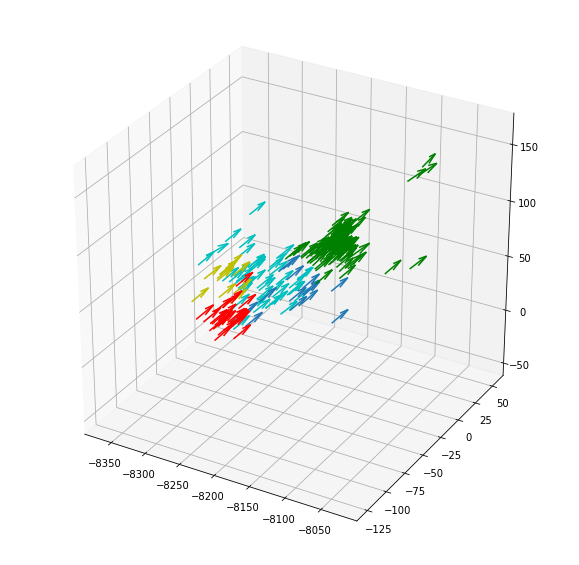

In [29]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
norm=10
ax.quiver(xa1,ya1,za1,vx1/norm,vy1/norm,vz1/norm,arrow_length_ratio=0.5)
ax.quiver(xa2,ya2,za2,vx2/norm,vy2/norm,vz2/norm,arrow_length_ratio=0.5,color='r')
ax.quiver(xa3,ya3,za3,vx3/norm,vy3/norm,vz3/norm,arrow_length_ratio=0.5,color='g')
ax.quiver(xa4,ya4,za4,vx4/norm,vy4/norm,vz4/norm,arrow_length_ratio=0.5,color='y')
ax.quiver(xa5,ya5,za5,vx5/norm,vy5/norm,vz5/norm,arrow_length_ratio=0.5,color='c')